coefficient of determination :  0.24456688961685802
slope :  [74.14307112]
intercept :  -23.01449070317839


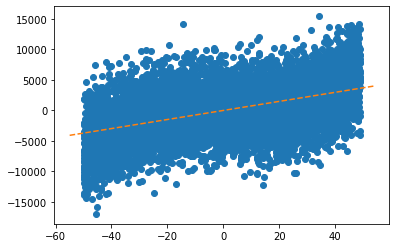

In [1]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import numpy as np
import pickle

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, '--')

inline = open('./data/train.pkl','rb')
data = pickle.load(inline,encoding='bytes')
temp_x = []
temp_y = []
for i in data:
    temp_x.append(i[0])
    temp_y.append(i[1])

x = np.array(temp_x).reshape(-1,1)
y = np.array(temp_y)

reg = LinearRegression().fit(x, y)
print('coefficient of determination : ' ,reg.score(x, y))
print("slope : " ,reg.coef_)
print("intercept : " ,reg.intercept_)

plt.plot(temp_x,temp_y,'o')
abline(reg.coef_,reg.intercept_)
plt.show()

In [2]:
import random
inline2 = open('../Linear-Regression/data/test.pkl','rb')
data2 = pickle.load(inline2,encoding='bytes')
var = list(range(len(data)))
random.shuffle(var)
packets = len(data)/10
temp_test_x = []
temp_test_y = []
resampled_x = []
resampled_y = []
temp_kx = []
temp_ky = []
z = 0

for i in var:
    if((z+1)%packets == 0):
        temp_kx.append(data[i][0])
        temp_ky.append(data[i][1])
        resampled_x.append(temp_kx)
        resampled_y.append(temp_ky)
        temp_ky = []
        temp_kx = []
    else:
        temp_kx.append(data[i][0])
        temp_ky.append(data[i][1])
    z+=1

for i in data2 : 
    temp_test_x.append(i[0])
    temp_test_y.append(i[1])
    
print(var)
print("Resampled X : \n" + str(resampled_x))
print("Resampled Y : \n" + str(resampled_y))

[7906, 3589, 116, 7750, 4645, 3583, 5296, 227, 4062, 4522, 26, 157, 6430, 6275, 2342, 6169, 4517, 6585, 2936, 279, 6682, 6537, 5135, 7296, 560, 3405, 7192, 1821, 1, 4578, 4864, 3864, 2547, 6268, 6814, 3123, 1056, 2228, 4422, 4618, 3593, 3221, 7110, 5397, 2566, 1950, 5614, 5319, 2182, 5128, 7368, 4754, 4612, 3694, 2508, 4987, 1213, 6654, 4604, 1190, 1985, 3135, 4014, 5427, 1408, 782, 5075, 4372, 2857, 133, 257, 6856, 2853, 5395, 5130, 1249, 6193, 6512, 4285, 6225, 1750, 491, 5236, 5454, 4928, 3301, 1346, 5823, 2417, 7217, 5645, 3627, 4192, 6917, 6876, 3497, 1051, 3200, 4065, 3380, 2475, 2945, 3383, 868, 7108, 5449, 5269, 2601, 7848, 1343, 5885, 753, 4597, 2832, 7099, 42, 895, 5727, 2749, 5180, 6757, 5610, 7681, 5662, 2118, 4788, 2852, 5622, 5754, 5588, 5605, 6925, 3016, 3479, 3168, 2657, 4507, 292, 1695, 3933, 2448, 6566, 5068, 4090, 3072, 6008, 3198, 7666, 1997, 4821, 6637, 1869, 1094, 6132, 1778, 3975, 1430, 398, 674, 2819, 2202, 7124, 4121, 4996, 6956, 4709, 105, 6767, 3249, 5346, 31

In [3]:
from sklearn.preprocessing import PolynomialFeatures
import math

x = np.array(temp_x).reshape(-1,1)
y = np.array(temp_y)

temp_test_x2 = np.array(temp_test_x).reshape(-1,1)

mean_bias = []
mean_variance = []
total_polynomials = 10
data_set = []
total_error = []
# irreduceble_error = []

for i in range(1,total_polynomials+1):        # Polynomial loop
    poly_bias = []
    val_mean = 0
    val_variance = 0
    temp_total_error = 0
    bias = [0 for k in range(1,total_polynomials+1)]
    for j in range(0,10):       # test case loop
        abc = np.array(resampled_x[j]).reshape(-1,1)
        poly_reg = PolynomialFeatures(degree=i)
        X_poly = poly_reg.fit_transform(abc)
        poly_reg.fit(X_poly,y)
        # print("i : " + str(i) + " | j : "+ str(j))
        lin_reg = LinearRegression().fit(X_poly,resampled_y[j])
        # plt.plot(temp_test_x2, lin_reg.predict(poly_reg.fit_transform(temp_test_x2)),'o')
        predicted_value = lin_reg.predict(poly_reg.fit_transform(temp_test_x2))
        poly_bias.append(predicted_value)
        # print('coefficient of determination : ' ,lin_reg.score(X_poly,resampled_y[j]))
    # below finding bias :
    for j in range(0,len(temp_test_y)):
        temp = 0
        for k in range(0,10):
            temp += poly_bias[k][j]
        temp = temp/10
        for k in range(0,10):
            val_mean +=  ((temp - temp_test_y[j]))
    val_mean = val_mean/len(poly_bias[0])
    mean_bias.append(val_mean)
    # variance finding down :
    data_set.append(poly_bias)
    for j in range(0,len(temp_test_y)):
        temp = 0
        for k in range(0,10):
            temp += poly_bias[k][j]
        temp = temp/10
        for k in range(0,10):
            val_variance +=  math.pow((poly_bias[k][j] - temp),2)
    val_variance = val_variance/len(poly_bias[0])
    mean_variance.append(val_variance)
    # total error below :
    for j in range(0,len(temp_test_y)):
        for k in range(0,10):
            temp_total_error += math.pow(temp_test_y[j] - poly_bias[k][j],2)
    temp_total_error = temp_total_error/len(poly_bias[0])
    total_error.append(temp_total_error)
        
squared_mean_bias = [ i*i for i in mean_bias]
irreduceble_error = [(total_error[i] - squared_mean_bias[i] - mean_variance[i]) for i in range(0,total_polynomials)]
print("\x1b[6;30;46m"+"Mean Bias : " + "\x1b[0m" + "\n",mean_bias)
print("\x1b[6;30;46m"+"Squared Mean Bias : " + "\x1b[0m" + "\n",squared_mean_bias)
print("\x1b[6;30;46m"+"Mean Variance : " + "\x1b[0m" + "\n",mean_variance)
print("\x1b[6;30;46m"+"Total Error : " + "\x1b[0m" + "\n",total_error)
print("\x1b[6;30;46m"+"Irreduceble Error : " + "\x1b[0m" + "\n",irreduceble_error)

Mean Bias : 
 [2316.6507785747067, 2279.53259275541, -111.01760123955451, -77.33818722958787, -82.43256122597715, -47.92512157826398, -34.52234223013698, -39.523156538016316, 5.233400345989022, -15.798809353801573]
Squared Mean Bias : 
 [5366870.829870795, 5196268.841434201, 12324.907784984734, 5981.195203958789, 6795.127150274472, 2296.817278291384, 1191.792113054699, 1562.0799027285418, 27.388479181398015, 249.6023769977681]
Mean Variance : 
 [410027.110748404, 652493.5055719296, 795099.1248090883, 1031480.3698007406, 1486685.1995255242, 1760530.904809031, 1790395.515438382, 2122894.867546025, 2603544.591100228, 2154537.5196816716]
Total Error : 
 [10445676.640026908, 10206407.90657189, 874916.8308691012, 1112575.2508690036, 1561210.8331489111, 1827313.7243350516, 1864309.618946862, 2197741.5653034854, 2675986.0209685443, 2237870.271016613]
Irreduceble Error : 
 [4668778.69940771, 4357645.559565758, 67492.79827502824, 75113.68586430419, 67730.50647311239, 64486.00224772934, 72722.311

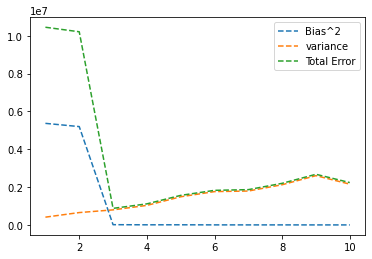

In [4]:
plt.plot([i for i in range(1,total_polynomials + 1)],squared_mean_bias,'--',label='Bias^2')
plt.plot([i for i in range(1,total_polynomials + 1)],mean_variance,'--',label='variance')
plt.plot([i for i in range(1,total_polynomials + 1)],total_error,'--',label='Total Error')
plt.legend()
# plt.plot(temp_test_x2, lin_reg.predict(poly_reg.fit_transform(temp_test_x2)),'o', color='red')
# abline(reg.coef_,reg.intercept_)
plt.show()

In [6]:
print("Still not fully convinced !!")

WTF Happening Here
